In [1]:
#Importing libraries for Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

In [2]:
dataset = pd.read_csv('C:\\Users\\w\\Downloads\\/train_ctrUa4K.csv')

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.shape

(614, 13)

In [6]:
#Generating a descriptive statistical summary of the dataset and providing an overview of the distribution of the dataset.
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
dataset.size

7982

In [9]:
dataset.ndim

2

In [10]:
dataset['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [11]:
columns = dataset.columns
columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:>

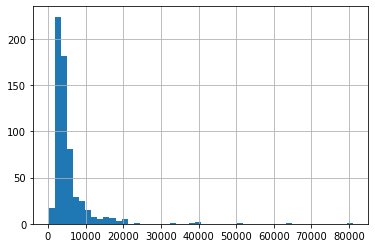

In [13]:
dataset['ApplicantIncome'].hist(bins=50)

<AxesSubplot:>

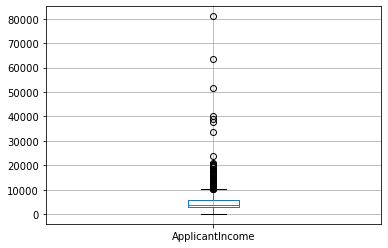

In [14]:
dataset.boxplot(column='ApplicantIncome')

Extreme values are the minimum and the maximum values in the dataset and all Values that fall beyond these extreme values are
considered as outliers. From the graphical representations for 'ApplicationIncome' in the two cells above, The extreme values are 0 for minimum and 10,000 for maximum. Therefore, I can conclude that Values under 0 and values over 10,000 would be considered extreme values as there are very few people who applied for loans in this category.

Also, many outliers exist in this dataset, Outliers are values that fall above 1.5 times interquartile range, and as said earlier these are values significantly different from other observations. From the boxplot above, we have values in the range of 37,000-40,000, 50,000, 62,000 and 80,000 mark. These areall  significantly different from the range of the values so i would consider them as outliers.

A histogram and a boxplot were used in analysing this data and yes, they are both comparable as they both show all the data points for the 'ApplicationIncome' column. Histograms provide a visual representation of the shape, center, and spread of the data, making it easy to see if the data is skewed, bimodal, or normally distributed. On the other hand, Box plots provide a summary of the distribution including the median, quartiles, and any outliers. In terms of my analysis for this dataset, The key difference was that boxplots helped me identify the outliers in the dataset better as well as the statistical summaries but the data points were a bit clustered and the histogram helped in that aspect as well as in noticing that the skewness and distribution of the data.

<AxesSubplot:>

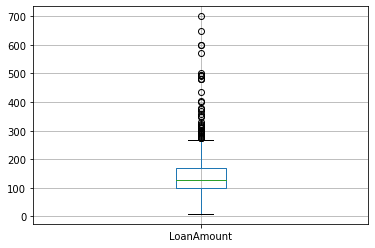

In [15]:
dataset.boxplot(column='LoanAmount')

<AxesSubplot:>

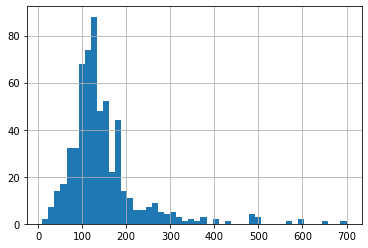

In [16]:
dataset['LoanAmount'].hist(bins=50)

# OBSERVATION
The extreme values for 'loanamount' column falls at 0 for minumum and 260 for maximum.

In [17]:
dataset['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [18]:
credit_history = dataset['Credit_History'].value_counts(ascending=True)
 
loan_probability = dataset.pivot_table(values='Loan_Status', index=['Credit_History'],
                       aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
 
print('Frequency Table for Credit History:')
print(credit_history)
print('\nProbability of getting loan for each Credit History class:')
print(loan_probability)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


In [19]:
dataset['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [20]:
dataset.shape

(614, 13)

In [21]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


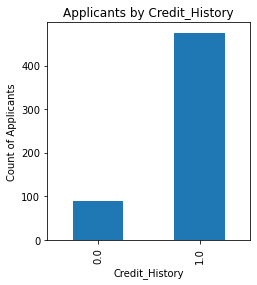

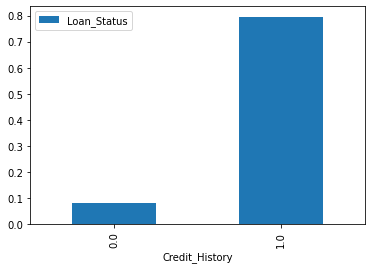

In [22]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
credit_history.plot(kind='bar')
plt.show()
 
ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
loan_probability.plot(kind = 'bar')
plt.show()

In [23]:
dataset['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [24]:
dataset.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [26]:
dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(), inplace = True)

In [27]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [28]:
dataset.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
dataset.shape

(614, 13)

In [30]:
dataset.to_csv('new_train.csv')

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='[Education, Self_Employed]'>

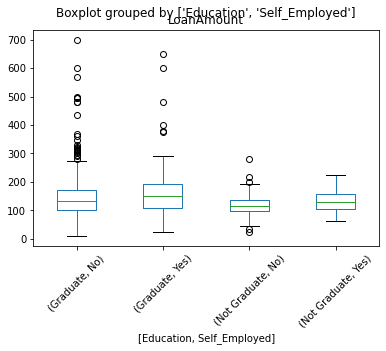

In [31]:
dataset.boxplot(column='LoanAmount', by = ['Education','Self_Employed'],
             grid=False, rot = 45, fontsize = 10)

In [32]:
dataset['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [33]:
dataset['Self_Employed'].fillna('No', inplace=True)

In [34]:
dataset['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [35]:
dataset.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,84.037468,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [37]:
#Creating New features by combining two existing variables
dataset['AllIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']

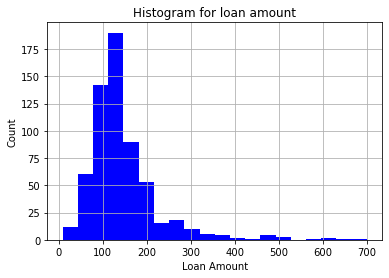

In [38]:
plt.hist(dataset['LoanAmount'], 20, facecolor='b')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Histogram for loan amount')
plt.grid(True)
plt.show()

<AxesSubplot:>

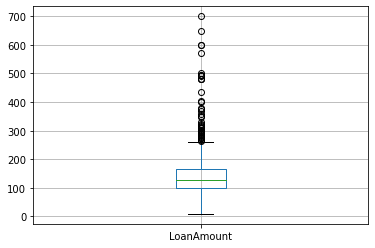

In [39]:
dataset.boxplot(column='LoanAmount')

In [40]:
dataset['LoanAmount_log'] = np.log(dataset['LoanAmount'])
#dataset['LoanAmount_log'].hist(bins = 20)

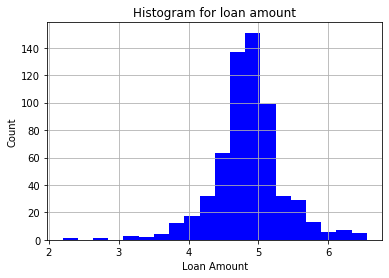

In [41]:
plt.hist(dataset['LoanAmount_log'], 20, facecolor='b')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Histogram for loan amount')
plt.grid(True)
plt.show()

<AxesSubplot:>

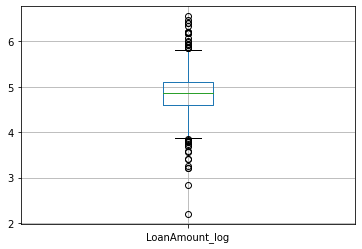

In [42]:
dataset.boxplot(column='LoanAmount_log')

In [43]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,AllIncome,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,4.986426
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,4.948760


In [44]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,AllIncome,LoanAmount_log
count,614.000000,614.000000,614.000000,600.00000,564.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,7024.705081,4.862066
std,6109.041673,2926.248369,84.037468,65.12041,0.364878,6458.663872,0.496575
min,150.000000,0.000000,9.000000,12.00000,0.000000,1442.000000,2.197225
25%,2877.500000,0.000000,100.250000,360.00000,1.000000,4166.000000,4.607658
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000,5416.500000,4.859812
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,7521.750000,5.104426
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,81000.000000,6.551080


In [45]:
#Dropping LoanAmount Column as it has been transformed
dataset = dataset.drop(['LoanAmount'], axis=1)

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='[Education, Self_Employed]'>

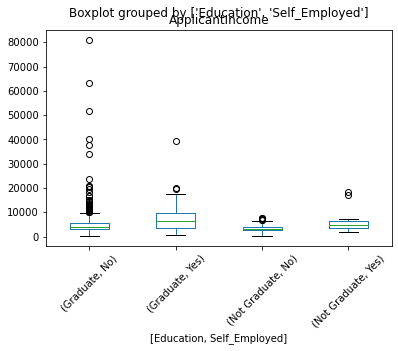

In [46]:
dataset.boxplot(column='ApplicantIncome', by = ['Education','Self_Employed'],
 grid=False, rot = 45, fontsize = 10)

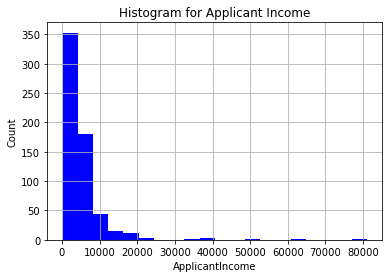

In [47]:
#Histogram to check for outliers in ApplicantIncome
plt.hist(dataset['ApplicantIncome'], 20, facecolor='b')
plt.xlabel('ApplicantIncome')
plt.ylabel('Count')
plt.title('Histogram for Applicant Income')
plt.grid(True)
plt.show()

In [48]:
dataset['ApplicantIncome_log'] = np.log(dataset['ApplicantIncome'])

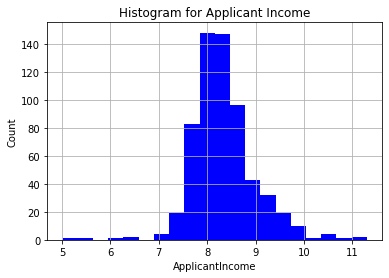

In [49]:
plt.hist(dataset['ApplicantIncome_log'], 20, facecolor='b')
plt.xlabel('ApplicantIncome')
plt.ylabel('Count')
plt.title('Histogram for Applicant Income')
plt.grid(True)
plt.show()

<AxesSubplot:>

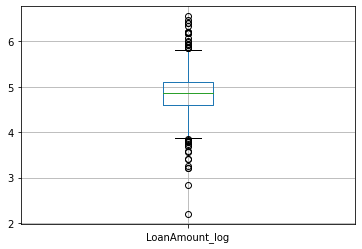

In [50]:
dataset.boxplot(column='LoanAmount_log')

In [51]:
#Dropping ApplicationIncome Column as it has been transformed
dataset = dataset.drop(['ApplicantIncome'], axis=1) 

In [52]:
dataset.describe()

,CoapplicantIncome,Loan_Amount_Term,Credit_History,AllIncome,LoanAmount_log,ApplicantIncome_log
count,614.000000,600.00000,564.000000,614.000000,614.000000,614.000000
mean,1621.245798,342.00000,0.842199,7024.705081,4.862066,8.341213
std,2926.248369,65.12041,0.364878,6458.663872,0.496575,0.645263
min,0.000000,12.00000,0.000000,1442.000000,2.197225,5.010635
25%,0.000000,360.00000,1.000000,4166.000000,4.607658,7.964677
50%,1188.500000,360.00000,1.000000,5416.500000,4.859812,8.246040
75%,2297.250000,360.00000,1.000000,7521.750000,5.104426,8.664750
max,41667.000000,480.00000,1.000000,81000.000000,6.551080,11.302204


In [53]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace = True)
                            #0:gets the mode of each column, 1: for each row
dataset['Married'].fillna(dataset['Married'].mode()[0], inplace = True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace = True)
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0], inplace = True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace = True)

In [54]:
dataset.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
CoapplicantIncome      0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
AllIncome              0
LoanAmount_log         0
ApplicantIncome_log    0
dtype: int64

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
columns = list(dataset) 
print(columns)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status', 'AllIncome', 'LoanAmount_log', 'ApplicantIncome_log']


In [57]:
dataset.dtypes

Loan_ID                 object
Gender                  object
Married                 object
Dependents              object
Education               object
Self_Employed           object
CoapplicantIncome      float64
Loan_Amount_Term       float64
Credit_History         float64
Property_Area           object
Loan_Status             object
AllIncome              float64
LoanAmount_log         float64
ApplicantIncome_log    float64
dtype: object

In [58]:
column_conversion = list(dataset.select_dtypes(exclude=['float64','int64']))

le = LabelEncoder()
for i in column_conversion:
 #print(i)
 dataset[i] = le.fit_transform(dataset[i])
    
dataset.dtypes

Loan_ID                  int32
Gender                   int32
Married                  int32
Dependents               int32
Education                int32
Self_Employed            int32
CoapplicantIncome      float64
Loan_Amount_Term       float64
Credit_History         float64
Property_Area            int32
Loan_Status              int32
AllIncome              float64
LoanAmount_log         float64
ApplicantIncome_log    float64
dtype: object

Firstly, the categorical variables in this data set are : Loan_ID,Gender,Married,Dependents,Education,Self_Employed, Property_Area, and Loan_Status. The cell above consists of the code which uses a for loop to convert them all into numerical variables. And as seen they have all been converted

In [59]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,AllIncome,LoanAmount_log,ApplicantIncome_log
0,0,1,0,0,0,0,0.0,360.0,1.0,2,1,5849.0,4.986426,8.674026
1,1,1,1,1,0,0,1508.0,360.0,1.0,0,0,6091.0,4.852030,8.430109
2,2,1,1,0,0,1,0.0,360.0,1.0,2,1,3000.0,4.189655,8.006368
3,3,1,1,0,1,0,2358.0,360.0,1.0,2,1,4941.0,4.787492,7.856707
4,4,1,0,0,0,0,0.0,360.0,1.0,2,1,6000.0,4.948760,8.699515


In [60]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [61]:
original_data = dataset.copy()
original_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,AllIncome,LoanAmount_log,ApplicantIncome_log
0,0,1,0,0,0,0,0.0,360.0,1.0,2,1,5849.0,4.986426,8.674026
1,1,1,1,1,0,0,1508.0,360.0,1.0,0,0,6091.0,4.852030,8.430109
2,2,1,1,0,0,1,0.0,360.0,1.0,2,1,3000.0,4.189655,8.006368
3,3,1,1,0,1,0,2358.0,360.0,1.0,2,1,4941.0,4.787492,7.856707
4,4,1,0,0,0,0,0.0,360.0,1.0,2,1,6000.0,4.948760,8.699515


In [62]:
original_data[0:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,AllIncome,LoanAmount_log,ApplicantIncome_log
0,0,1,0,0,0,0,0.0,360.0,1.0,2,1,5849.0,4.986426,8.674026
1,1,1,1,1,0,0,1508.0,360.0,1.0,0,0,6091.0,4.852030,8.430109
2,2,1,1,0,0,1,0.0,360.0,1.0,2,1,3000.0,4.189655,8.006368
3,3,1,1,0,1,0,2358.0,360.0,1.0,2,1,4941.0,4.787492,7.856707
4,4,1,0,0,0,0,0.0,360.0,1.0,2,1,6000.0,4.948760,8.699515


In [63]:
dataset[0:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,AllIncome,LoanAmount_log,ApplicantIncome_log
0,0,1,0,0,0,0,0.0,360.0,1.0,2,1,5849.0,4.986426,8.674026
1,1,1,1,1,0,0,1508.0,360.0,1.0,0,0,6091.0,4.852030,8.430109
2,2,1,1,0,0,1,0.0,360.0,1.0,2,1,3000.0,4.189655,8.006368
3,3,1,1,0,1,0,2358.0,360.0,1.0,2,1,4941.0,4.787492,7.856707
4,4,1,0,0,0,0,0.0,360.0,1.0,2,1,6000.0,4.948760,8.699515


In [64]:
data_for_norm = dataset.drop(['Loan_ID','Loan_Status'], axis=1)

In the above cell, I excluded two coulmns 'Loan_Status' and 'Loan_ID' from being normalised. 'Loan_Status'
is a target class and is a binary class. Therefore, normalisation is not needed on it. I also dropped 'Loan_ID'.

The reason why 'Loan_ID' was dropped is because it serves as the primary key for that dataset. Which means that it is a unique identifer used to determine the details of a particular loan. If the Loan ID is normalised it would be impossible to know the details of a paricular loan. Therefore it has to be excluded from being dropped.

In [65]:
normalized_data = normalize(data_for_norm )

In [66]:
print(normalized_data[0:5])

[[1.70646210e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 6.14326357e-02 1.70646210e-04
  3.41292421e-04 9.98109684e-01 8.50914644e-04 1.48018966e-03]
 [1.59103313e-04 1.59103313e-04 1.59103313e-04 0.00000000e+00
  0.00000000e+00 2.39927797e-01 5.72771928e-02 1.59103313e-04
  0.00000000e+00 9.69098282e-01 7.71974091e-04 1.34125829e-03]
 [3.30957321e-04 3.30957321e-04 0.00000000e+00 0.00000000e+00
  3.30957321e-04 0.00000000e+00 1.19144636e-01 3.30957321e-04
  6.61914642e-04 9.92871963e-01 1.38659691e-03 2.64976596e-03]
 [1.82260549e-04 1.82260549e-04 0.00000000e+00 1.82260549e-04
  0.00000000e+00 4.29770376e-01 6.56137978e-02 1.82260549e-04
  3.64521099e-04 9.00549375e-01 8.72570875e-04 1.43196770e-03]
 [1.66367230e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 5.98922027e-02 1.66367230e-04
  3.32734460e-04 9.98203379e-01 8.23311474e-04 1.44731417e-03]]


In [67]:
normalized_data.shape

(614, 12)

In [68]:
dataset.shape

(614, 14)

In [69]:
normalized_data = pd.DataFrame(normalized_data, columns=data_for_norm.columns)

In [70]:
normalized_data.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,AllIncome,LoanAmount_log,ApplicantIncome_log
0,0.000171,0.000000,0.000000,0.000000,0.000000,0.000000,0.061433,0.000171,0.000341,0.998110,0.000851,0.001480
1,0.000159,0.000159,0.000159,0.000000,0.000000,0.239928,0.057277,0.000159,0.000000,0.969098,0.000772,0.001341
2,0.000331,0.000331,0.000000,0.000000,0.000331,0.000000,0.119145,0.000331,0.000662,0.992872,0.001387,0.002650
3,0.000182,0.000182,0.000000,0.000182,0.000000,0.429770,0.065614,0.000182,0.000365,0.900549,0.000873,0.001432
4,0.000166,0.000000,0.000000,0.000000,0.000000,0.000000,0.059892,0.000166,0.000333,0.998203,0.000823,0.001447


In [72]:
normalized_data['Loan_ID'] = dataset['Loan_ID'] 

In [73]:
normalized_data['Loan_Status'] = dataset['Loan_Status']

In [74]:
normalized_data.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,AllIncome,LoanAmount_log,ApplicantIncome_log,Loan_ID,Loan_Status
0,0.000171,0.000000,0.000000,0.000000,0.000000,0.000000,0.061433,0.000171,0.000341,0.998110,0.000851,0.001480,0,1
1,0.000159,0.000159,0.000159,0.000000,0.000000,0.239928,0.057277,0.000159,0.000000,0.969098,0.000772,0.001341,1,0
2,0.000331,0.000331,0.000000,0.000000,0.000331,0.000000,0.119145,0.000331,0.000662,0.992872,0.001387,0.002650,2,1
3,0.000182,0.000182,0.000000,0.000182,0.000000,0.429770,0.065614,0.000182,0.000365,0.900549,0.000873,0.001432,3,1
4,0.000166,0.000000,0.000000,0.000000,0.000000,0.000000,0.059892,0.000166,0.000333,0.998203,0.000823,0.001447,4,1


In [75]:
normalized_data.describe()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,AllIncome,LoanAmount_log,ApplicantIncome_log,Loan_ID,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.000145,0.000112,0.000131,0.000047,0.000020,0.204650,0.064020,0.000158,0.000199,0.952830,0.000877,0.001519,306.500000,0.687296
std,0.000103,0.000103,0.000209,0.000099,0.000061,0.204970,0.034536,0.000105,0.000199,0.054784,0.000377,0.000684,177.390811,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001498,0.000000,0.000000,0.710607,0.000073,0.000102,0.000000,0.000000
25%,0.000073,0.000000,0.000000,0.000000,0.000000,0.000000,0.040127,0.000089,0.000000,0.917680,0.000637,0.001064,153.250000,0.000000
50%,0.000148,0.000120,0.000000,0.000000,0.000000,0.197581,0.060526,0.000158,0.000169,0.978014,0.000849,0.001441,306.500000,1.000000
75%,0.000202,0.000185,0.000212,0.000000,0.000000,0.390646,0.078771,0.000217,0.000295,0.997256,0.001067,0.001871,459.750000,1.000000
max,0.000673,0.000522,0.001608,0.000673,0.000455,0.703583,0.242215,0.000673,0.001346,0.999996,0.002674,0.004894,613.000000,1.000000


<AxesSubplot:>

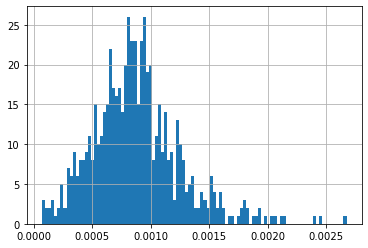

In [76]:
#PLAY CELL
normalized_data['LoanAmount_log'].hist(bins=100)

In [78]:
columns = list(normalized_data.columns) 
columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'CoapplicantIncome',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'AllIncome',
 'LoanAmount_log',
 'ApplicantIncome_log',
 'Loan_ID',
 'Loan_Status']

In [79]:
normalized_data.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,AllIncome,LoanAmount_log,ApplicantIncome_log,Loan_ID,Loan_Status
0,0.000171,0.000000,0.000000,0.000000,0.000000,0.000000,0.061433,0.000171,0.000341,0.998110,0.000851,0.001480,0,1
1,0.000159,0.000159,0.000159,0.000000,0.000000,0.239928,0.057277,0.000159,0.000000,0.969098,0.000772,0.001341,1,0
2,0.000331,0.000331,0.000000,0.000000,0.000331,0.000000,0.119145,0.000331,0.000662,0.992872,0.001387,0.002650,2,1
3,0.000182,0.000182,0.000000,0.000182,0.000000,0.429770,0.065614,0.000182,0.000365,0.900549,0.000873,0.001432,3,1
4,0.000166,0.000000,0.000000,0.000000,0.000000,0.000000,0.059892,0.000166,0.000333,0.998203,0.000823,0.001447,4,1


In [80]:
features = normalized_data.drop(['Loan_ID','Loan_Status','AllIncome'], axis = 1)
 
classes = pd.DataFrame(normalized_data['Loan_Status'])

In [81]:
print('Features:')
print(features.head())
 
print('Classes:')
print(classes.head())

Features:
     Gender   Married  Dependents  Education  Self_Employed  \
0  0.000171  0.000000    0.000000   0.000000       0.000000   
1  0.000159  0.000159    0.000159   0.000000       0.000000   
2  0.000331  0.000331    0.000000   0.000000       0.000331   
3  0.000182  0.000182    0.000000   0.000182       0.000000   
4  0.000166  0.000000    0.000000   0.000000       0.000000   

   CoapplicantIncome  Loan_Amount_Term  Credit_History  Property_Area  \
0           0.000000          0.061433        0.000171       0.000341   
1           0.239928          0.057277        0.000159       0.000000   
2           0.000000          0.119145        0.000331       0.000662   
3           0.429770          0.065614        0.000182       0.000365   
4           0.000000          0.059892        0.000166       0.000333   

   LoanAmount_log  ApplicantIncome_log  
0        0.000851             0.001480  
1        0.000772             0.001341  
2        0.001387             0.002650  
3       

In [82]:
normalized_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,AllIncome,LoanAmount_log,ApplicantIncome_log,Loan_ID,Loan_Status
0,0.000171,0.000000,0.000000,0.000000,0.000000,0.000000,0.061433,0.000171,0.000341,0.998110,0.000851,0.001480,0,1
1,0.000159,0.000159,0.000159,0.000000,0.000000,0.239928,0.057277,0.000159,0.000000,0.969098,0.000772,0.001341,1,0
2,0.000331,0.000331,0.000000,0.000000,0.000331,0.000000,0.119145,0.000331,0.000662,0.992872,0.001387,0.002650,2,1
3,0.000182,0.000182,0.000000,0.000182,0.000000,0.429770,0.065614,0.000182,0.000365,0.900549,0.000873,0.001432,3,1
4,0.000166,0.000000,0.000000,0.000000,0.000000,0.000000,0.059892,0.000166,0.000333,0.998203,0.000823,0.001447,4,1
5,0.000095,0.000095,0.000191,0.000000,0.000095,0.399808,0.034302,0.000095,0.000191,0.915956,0.000532,0.000819,5,1
6,0.000241,0.000241,0.000000,0.000241,0.000000,0.365087,0.086696,0.000241,0.000482,0.926925,0.001097,0.001868,6,1
7,0.000164,0.000164,0.000493,0.000000,0.000000,0.411148,0.059111,0.000000,0.000164,0.909649,0.000831,0.001317,7,0
8,0.000174,0.000174,0.000348,0.000000,0.000000,0.265396,0.062610,0.000174,0.000348,0.962103,0.000891,0.001443,8,1
9,0.000038,0.000038,0.000038,0.000000,0.000000,0.418365,0.013732,0.000038,0.000038,0.908175,0.000223,0.000361,9,0


In [83]:
normalized_data.shape

(614, 14)

In [84]:
from matplotlib import pyplot

In [85]:
x_train, x_test, y_train, y_test = train_test_split(features, classes, test_size= .33, 
                                                    random_state = 48)
 
print(x_train.shape, x_test.shape)

(411, 11) (203, 11)


In [86]:
decisionTree = DecisionTreeClassifier(criterion='entropy')
print(decisionTree)

DecisionTreeClassifier(criterion='entropy')


In [87]:
dtc_model = decisionTree.fit(x_train, y_train)

Feature: 0, Score: 0.05474
Feature: 1, Score: 0.03393
Feature: 2, Score: 0.04645
Feature: 3, Score: 0.05276
Feature: 4, Score: 0.01313
Feature: 5, Score: 0.08159
Feature: 6, Score: 0.13408
Feature: 7, Score: 0.33701
Feature: 8, Score: 0.06148
Feature: 9, Score: 0.03914
Feature: 10, Score: 0.14568


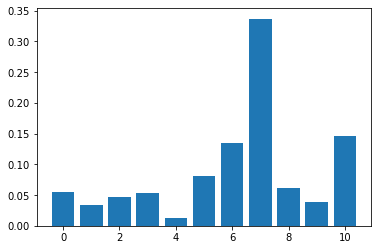

In [88]:
# feature importance
importance = dtc_model.feature_importances_
 
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# Barchat for feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [89]:
prediction = dtc_model.predict(x_test) 

In [90]:
y_true = le.inverse_transform(y_test["Loan_Status"])
y_pred = le.inverse_transform(prediction)

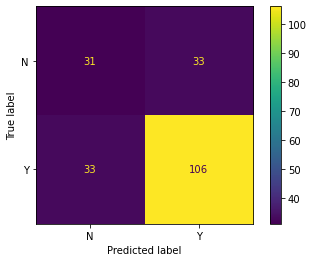

In [91]:
cm = confusion_matrix(y_true, y_pred)
labels = ['N', 'Y']
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

In [92]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           N       0.48      0.48      0.48        64
           Y       0.76      0.76      0.76       139

    accuracy                           0.67       203
   macro avg       0.62      0.62      0.62       203
weighted avg       0.67      0.67      0.67       203



# VISUALISING THE DECISION TREE

In [93]:
#Download graphviz before running this line
graphviz_path = 'C:/Program Files/Graphviz/bin/'

In [94]:
import os
 
os.environ["PATH"] += os.pathsep + graphviz_path

In [95]:
pip install graphviz

In [96]:
from graphviz import Source
from sklearn import tree
graph = Source( tree.export_graphviz(dtc_model, out_file=None, feature_names=features.columns))

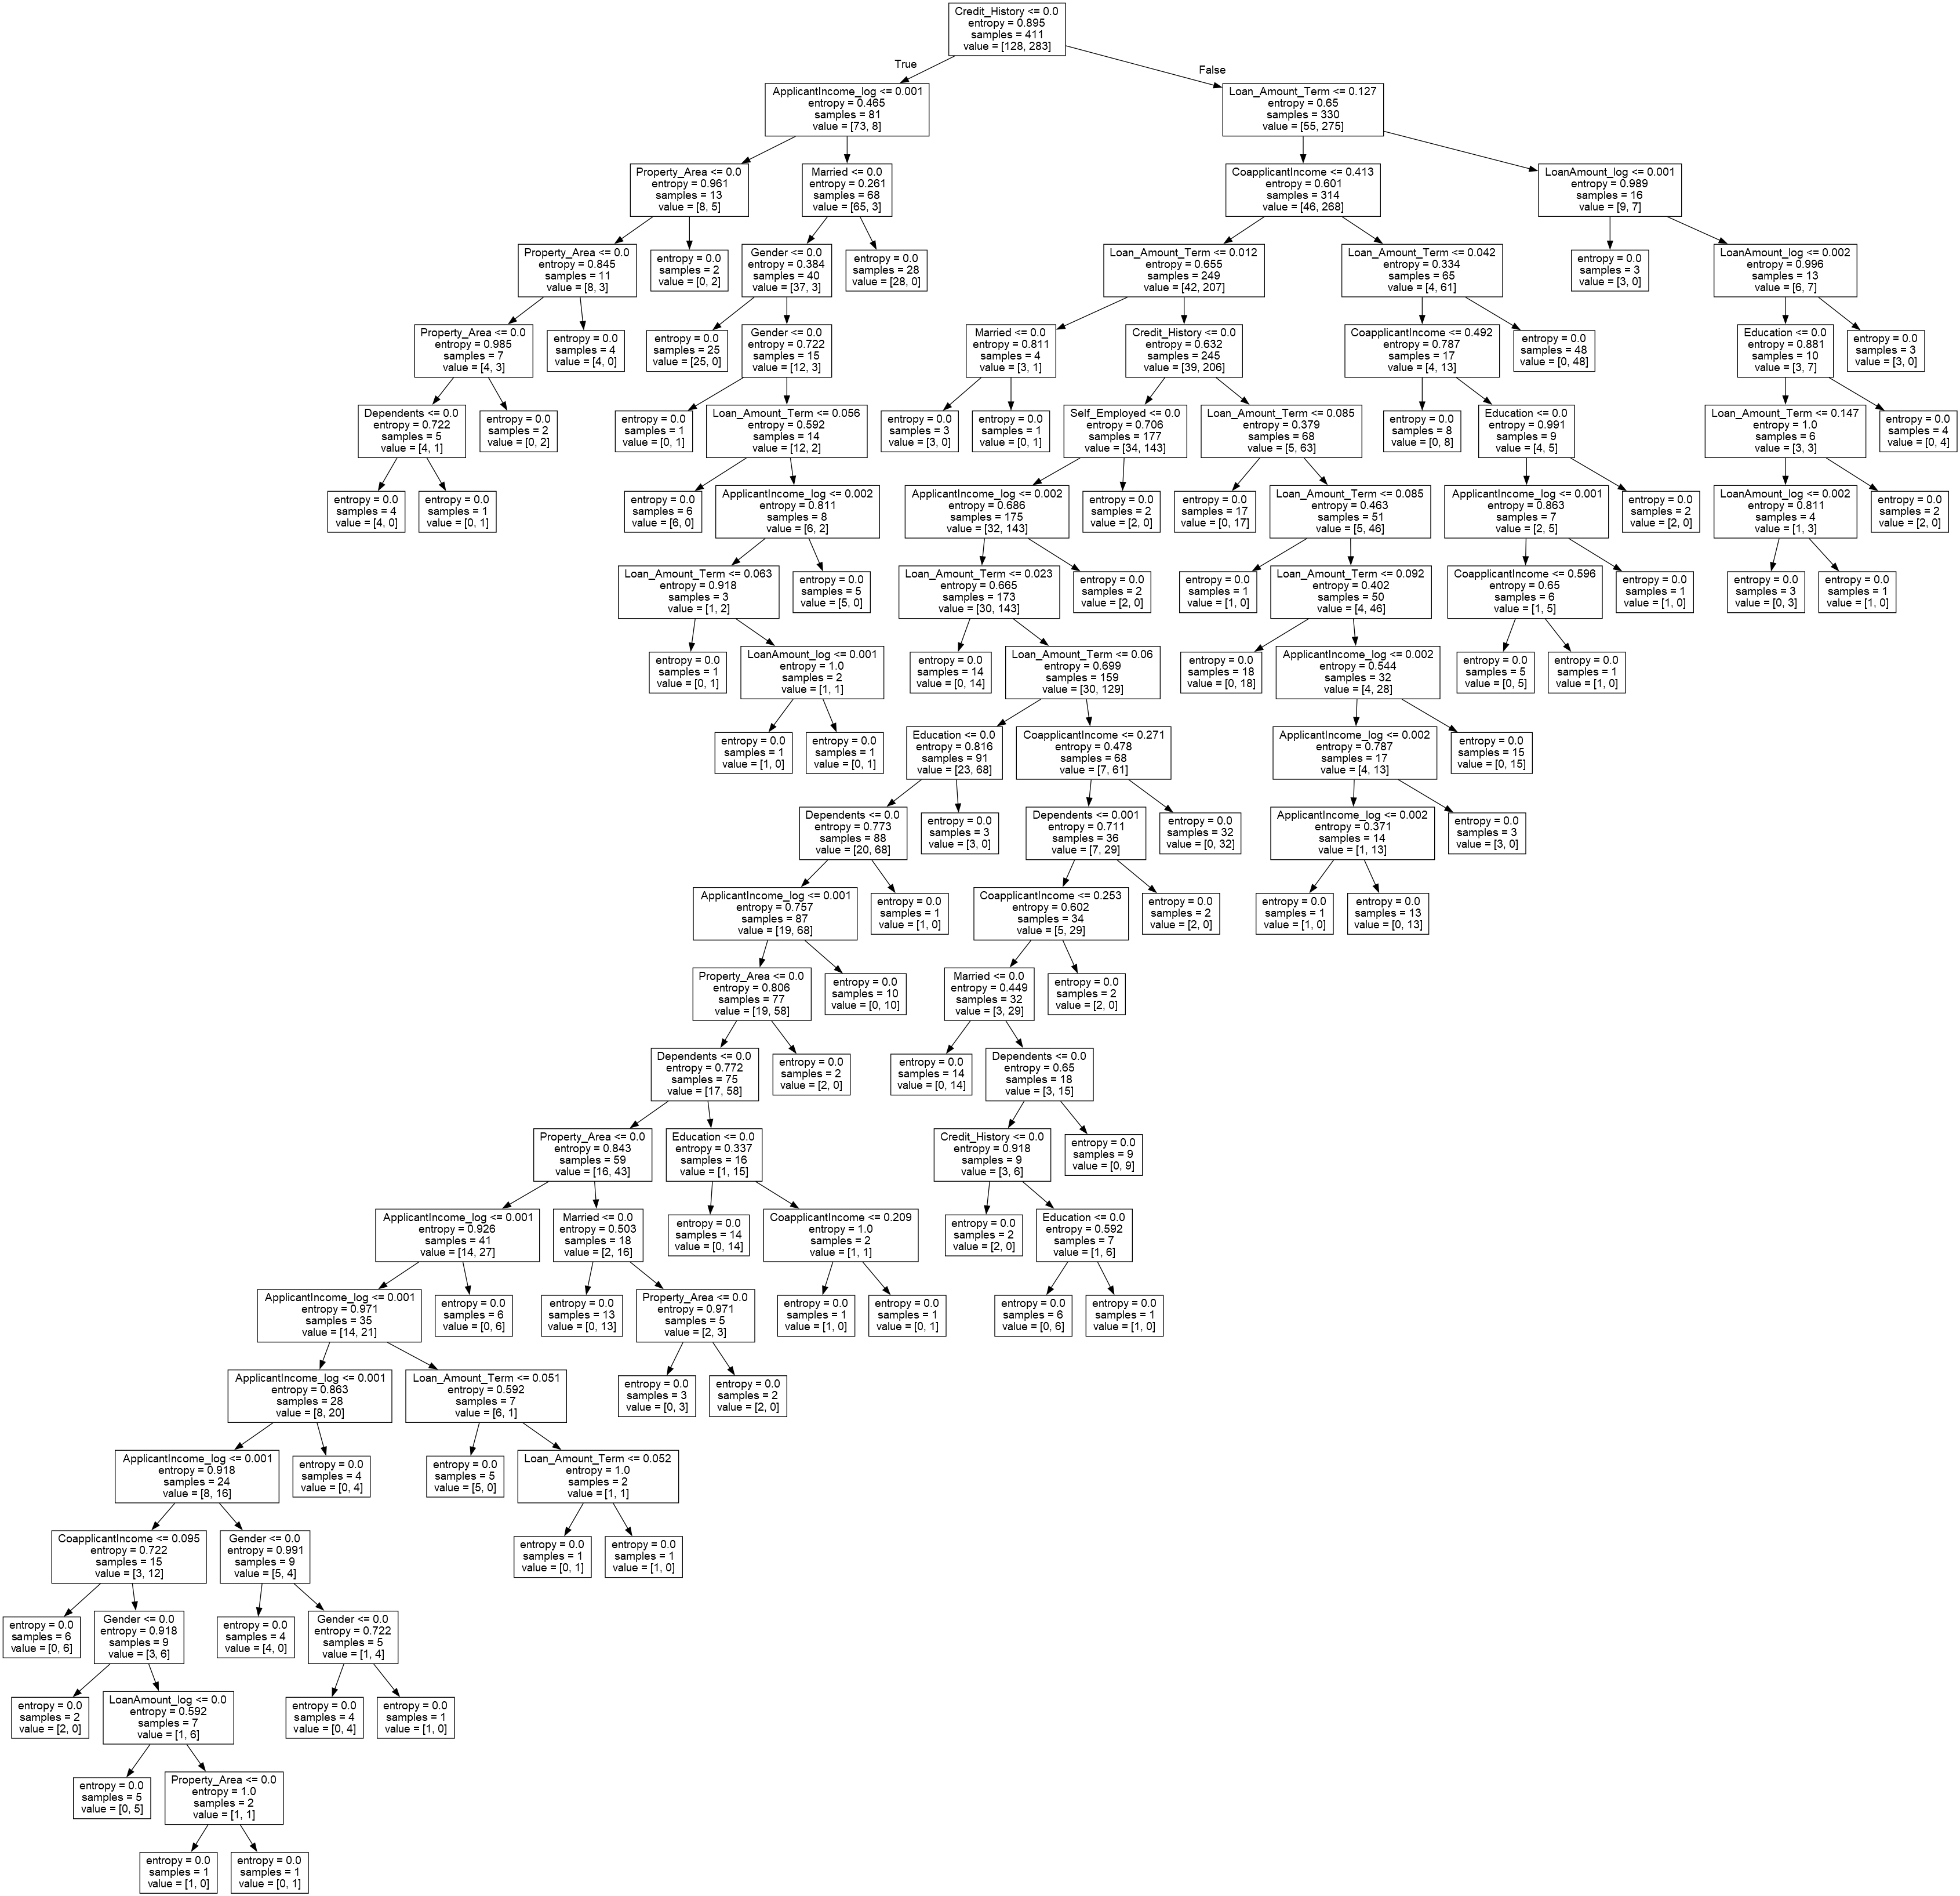

In [97]:
from cairosvg import svg2png
from IPython.display import Image
 
 
svg2png(bytestring=graph.pipe(format='svg'),write_to='decision tree.png')
Image("decision tree.png")